# Module 10 Part 1: Introduction to Neural Networks

# Introduction

In this module we are going to introduce neural networks. We are also going to implement a simple feedforward neural network from scratch (using NumPy), to give you a thorough understanding of what is happening behind the scenes before we go on to use libraries that simplify setting up a network.

This module consists of 2 parts:

- **Part 1** - Focuses on the fundamentals (including a custom implementation of a feedforward neural network from scratch using NumPy)

- **Part 2** - Focuses on using packages like TensorFlow and Keras to rapidly develop and train deep neural network models

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Learning Outcomes

In this module, you will gain a solid understanding of the core concepts necessary to build simple neural network models. These include:

- The basic structure of a neural network model
- The anatomy of a neuron, including various activation functions 
- Neural network training techniques such as weight initialization and backpropagation

# Readings and Resources

We invite you to further supplement this notebook with the following recommended texts.

- Géron, A. (2019). Chapter 10: Introduction to Artificial Neural Networks with Keras in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/


- TensorFlow documentation and tutorials: https://www.tensorflow.org/tutorials


- Demystifying Deep Convolutional Neural Networks: http://scs.ryerson.ca/~aharley/neural-networks/


- CS231n Convolutional Neural Networks for Visual Recognition: http://cs231n.github.io/neural-networks-case-study/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-10-Part-1:-Introduction-to-Neural-Networks" data-toc-modified-id="Module-10-Part-1:-Introduction-to-Neural-Networks">Module 10 Part 1: Introduction to Neural Networks</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Setup-Notes" data-toc-modified-id="Setup-Notes">Setup Notes</a></span>
</li>
<li><span><a href="#Basics-of-Neural-Networks" data-toc-modified-id="Basics-of-Neural-Networks">Basics of Neural Networks</a></span>
<ul class="toc-item">
<li><span><a href="#Why-is-Deep-Learning-taking-off?" data-toc-modified-id="Why-is-Deep-Learning-taking-off?">Why is Deep Learning taking off?</a></span>
</li>
<li><span><a href="#Anatomy-of-a-Neuron" data-toc-modified-id="Anatomy-of-a-Neuron">Anatomy of a Neuron</a></span>
</li>
<li><span><a href="#Feedforward-Neural-Networks" data-toc-modified-id="Feedforward-Neural-Networks">Feedforward Neural Networks</a></span>
</li>
<li><span><a href="#Activation-Functions" data-toc-modified-id="Activation-Functions">Activation Functions</a></span>
</li>
<li><span><a href="#Random-Initialization" data-toc-modified-id="Random-Initialization">Random Initialization</a></span>
</li>
<li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation">Backpropagation</a></span>
</li>
</ul>
</li>
<li><span><a href="#Building-a-Neural-Network-from-Scratch-with-NumPy" data-toc-modified-id="Building-a-Neural-Network-from-Scratch-with-NumPy">Building a Neural Network from Scratch with NumPy</a></span>
<ul class="toc-item">
<li><span><a href="#Manual-Forward-Propagation" data-toc-modified-id="Manual-Forward-Propagation">Manual Forward Propagation</a></span>
</li>
<li><span><a href="#Manual-backpropagation" data-toc-modified-id="Manual-backpropagation">Manual backpropagation</a></span>
</li>
<li><span><a href="#Constructing-our-Neural-Network" data-toc-modified-id="Constructing-our-Neural-Network">Constructing our Neural Network</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Setup Notes

TensorFlow is available as a Python library (which is the implementation we will be using here). Hence, it must be installed into your Python package directory before it can be used. This can easily be done using the appropriate Python package installer (i.e. `pip`, `conda`). For more details on configuring TensorFlow, please review the official documentation on installation [**here**](https://www.tensorflow.org/install).

We will not be dealing with GPUs or TPUs (i.e. external computing units) in this course. You should not have to configure a container (i.e. Docker) to run TensorFlow.

# Basics of Neural Networks

## Why is Deep Learning taking off?

An artificial neural network (ANN), or simply "neural net" for short, is a computational model that is inspired by the way biological neural networks in the brains of animals process information. ANNs have generated a lot of excitement in machine learning research and in industry, thanks to many breakthrough results in speech recognition, computer vision and text processing.

**Deep learning** is a general term that refers to the application and development of very large neural networks with many "layers" and "neurons" connected to one another (don't worry, we will dive into what this terminology means shortly). Andrew Ng, Chief Scientist at Baidu Research and founder of Google Brain, outlines three main reasons why this particular group of algorithms is taking off:

**1. Big Data**

- Neural networks tend to outperform traditional machine learning techniques when the size of the data increases


- Deep neural network models also seem to outperform simpler or shallower neural network models as the size of data increases


- This trend has been further enhanced by the era of big data and the advent of technologies like smart phones and the Internet of Things

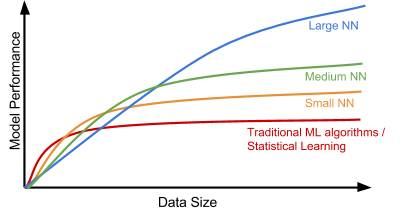
<div align="center">
<center><b>Figure 1. Neural Network Performance vs Other Algos</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>


**2. Advanced Computation**

- While the advent of big data was an important development for neural networks, what was equally as important was the development of computers fast enough to handle and perform computations on all this data


- This includes advances like GPUs, distributed computing, and cloud technologies that have democratized the field and allowed almost anyone to train and deploy sophisticated and massive deep learning models



**3. Algorithm Development**

- Due to the flexible nature of how neural networks are constructed, new approaches and applications of neural networks are continually being developed and tested


- The research and practitioner community is incredibly engaged and enthusiastic, and much of the cutting-edge techniques and research is made available to the public

## Anatomy of a Neuron

Okay, we now know why neural networks are so popular. But what exactly *is* a neural network? Let's begin this process by first understanding the fundamental component of all neural network models, the **neuron.**

A neuron is the basic unit of computation in a neural network model, and it is often referred to as a node or unit. It receives input from some other nodes, or from an external source and computes an output. Each input has an associated weight $(w)$, which is assigned on the basis of the input's importance relative to other inputs to that neuron. The node applies a function $f$ (defined below) to the weighted sum of its inputs as shown in the image below:

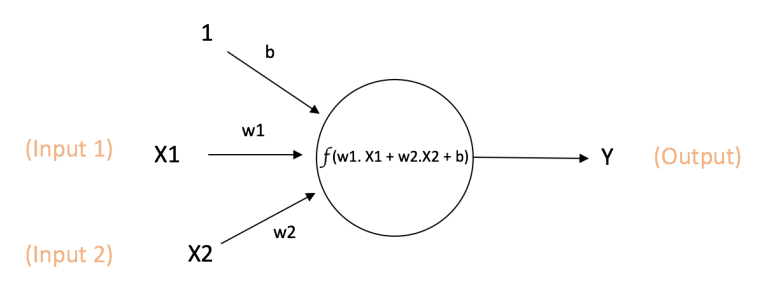
<div align="center">
<center><b>Figure 2. A basic neuron with 2 inputs, a bias term, and 1 output</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>



Mathematically, this can be represented as follows (where the superscripts should be read the same as subscripts, not as powers):


$$Y =  f(x^1 \cdot w^1  + x^2 \cdot w^2  + b)$$ 


The above neuron takes numerical inputs $x^1$ and $x^2$ and has weights $w^1$ and $w^2$ associated with those inputs. Additionally, there is another input $b$ (called the **bias**). The main function of bias is to provide every node with a trainable constant value (in addition to the normal inputs that the node receives). The output $Y$ from the neuron is computed as shown in the notation above.

The function $f$ is typically non-linear and is called the **activation function**. If the equation *inside* of $f$ looks familiar to you, there is good reason: each neuron (prior to activation) performs what is essentially a linear regression calculation, multiplying the weight vector by the input vector and adding a bias to produce the output or $Y$ value. This linear output (also called **linear activation**) is then fed through the activation function, which typically performs some sort of non-linear calculation. This is important because most ***real world relationships in data are non-linear and we want neurons to learn these non-linear representations*** (more on this later).

The activation function takes a single number (the linear activation) and performs a certain fixed mathematical operation on it. There are several activation functions you may encounter in practice:

- **Sigmoid:** Takes a real-valued input and squashes it into a range between 0 and 1 (applying the sigmoid activation function to a single neuron simply equals a logistic regression).


$$ \sigma(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$


- **Tanh:** Takes a real-valued input and squashes it into the range [-1, 1]. This is essentially a shifted version of the sigmoid function.


$$ \tanh(x) =  \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}  $$


- **ReLU:** ReLU stands for Rectified Linear Unit. It takes a real-valued input and thresholds it at zero (replaces negative values with zero).


$$ \text{ReLU}(x) =  \text{max}(x,0)  $$


All of these activation functions, as we will see, can be useful depending on the specific type of application. We have created custom functions for each of these activations and plotted their outputs from -5 to 5 below:

In [0]:
# Basic setup
import numpy as np
import matplotlib.pyplot as plt

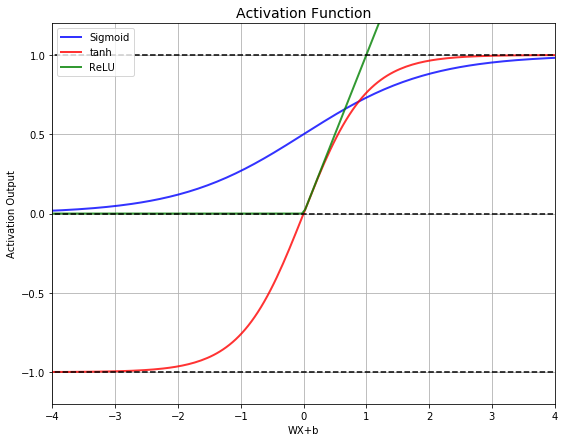

In [0]:
# Plot the sigmoid function
z = np.linspace(-5, 5, 200)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    num = np.exp(z) - np.exp(-z)
    denom = np.exp(z) + np.exp(-z)
    return num/denom

def relu(z):
    return np.where(z < 0.0, 0.0, z)

# Plot activations
plt.figure(figsize=(9,7))
plt.plot(z, sigmoid(z), "b-", linewidth=2, label='Sigmoid', alpha=0.8)
plt.plot(z, tanh(z), "r-", linewidth=2, label='tanh', alpha=0.8)
plt.plot(z, relu(z), "g-", linewidth=2, label='ReLU',alpha=0.8)

# Format plot
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.axis([-4, 4, -1.2, 1.2])
plt.legend()
plt.grid(True)
plt.title("Activation Function", fontsize=14)
plt.xlabel('WX+b')
plt.ylabel('Activation Output')
plt.show()

We will discuss these activation functions (and several others), including their respective use cases, benefits and drawbacks in more detail later on in this module and the next. For now, it is it important to understand that a single neuron is simply linear multiplication of a weight vector $W$ and an input vector (a bias term is typically added as well), which is then run through a (typically) non-linear activation function.

Below is a simple example of a single neuron's output, where:
- $z = W^TX + b$ refers to the *linear activation*
- $σ(z)$ refers to the *non-linear activation* using function $σ$
- $a$ refers to the output of that particular neuron

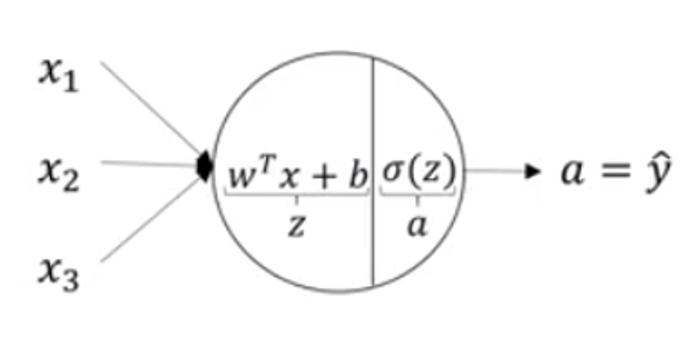
<div align="center">
<center><b>Figure 3. A basic neuron with 3 inputs and 1 output</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>


Below, we implement these equations for a single neuron with 3 inputs in NumPy.

In [0]:
import numpy as np
X = np.array([4, 5, 1]) # X1, X2, b
W = np.array([[0.1], [0.2], [0.3]]) # w1, w2, b
sigmoid = lambda x: 1 / (1+np.exp(-x))

neuron_linear = np.dot(X,W)
neuron_activation = sigmoid(neuron_linear)

print('Single neuron output:', neuron_activation)

Single neuron output: [0.84553473]


As you may have noticed, a single neuron with a sigmoid activation function simply represents a logistic regression. Each unit in a network using this activation function is a probabilistic decision maker! To turn this into a neural network, all we have to do is add more neurons and connect them; as you will see, this is actually quite simple.

## Feedforward Neural Networks

The feedforward neural network was the first and simplest type of artificial neural network devised. It contains multiple neurons (nodes) arranged in **layers**. Nodes from adjacent layers have connections or edges between them, and all of these connections have weights associated with them. 

In essence, we are simply taking a bunch of neurons and stacking them on top of one another, layer by layer, and connecting these layers via weight vectors &mdash; the outputs of layer 1 get fed as inputs to layer 2, the outputs of layer 2 get fed into layer 3, and so on until we reach the final output layer. 

**NOTE:** Any neural network model with more than 2 layers is considered **deep learning.**

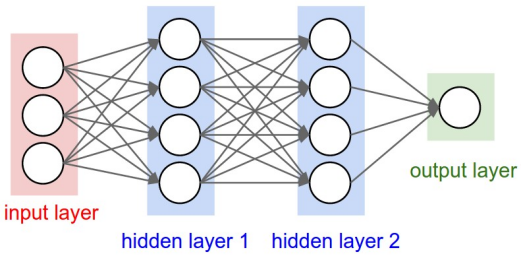
<div align="center">
<center><b>Figure 4. A basic feedforward neural network</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>

A feedforward neural network can consist of three types of nodes:

1. **Input nodes:** These nodes provide information from the outside world to the network and are together referred to as the "input layer". No computation is performed in any of the input nodes &mdash; they just pass on the information to the hidden nodes.<br><br>

2. **Hidden nodes:** These nodes have no direct connection with the outside world (hence the name hidden). They perform computations and transfer information from the input nodes to the output nodes. A collection of hidden nodes forms a "hidden layer." While a feedforward network will only have a single input layer and a single output layer, it can have zero or more hidden layers.<br><br>

3. **Output nodes:** These nodes are collectively referred to as the output layer and are responsible for computations and transferring information from the network to the outside world. These are the prediction nodes!

In a feedforward network, the information moves in only one direction (forward) from the input nodes, through the hidden nodes and to the output nodes. There are no cycles or loops in the network (this property of feed forward networks is different from recurrent neural networks in which the connections between the nodes form a cycle, but this is outside the scope of this course).

Below is an example of a **fully connected multilayer feedforward network** (formally known as a *multi-layer perceptron*) with two inputs and a single hidden layer with four neurons. It is called fully connected because each input is connected to each neuron in the subsequent layer via weights. This network is for binary classification, as we use the sigmoid activation function on the *single* output neuron to produce a $Y$ value between 0 and 1:

- **Input layer:** 2 variables + bias


- **One Hidden layer:** 4 neurons + bias, tanh activation function


- **One Output layer:** 1 neuron, sigmoid activation function

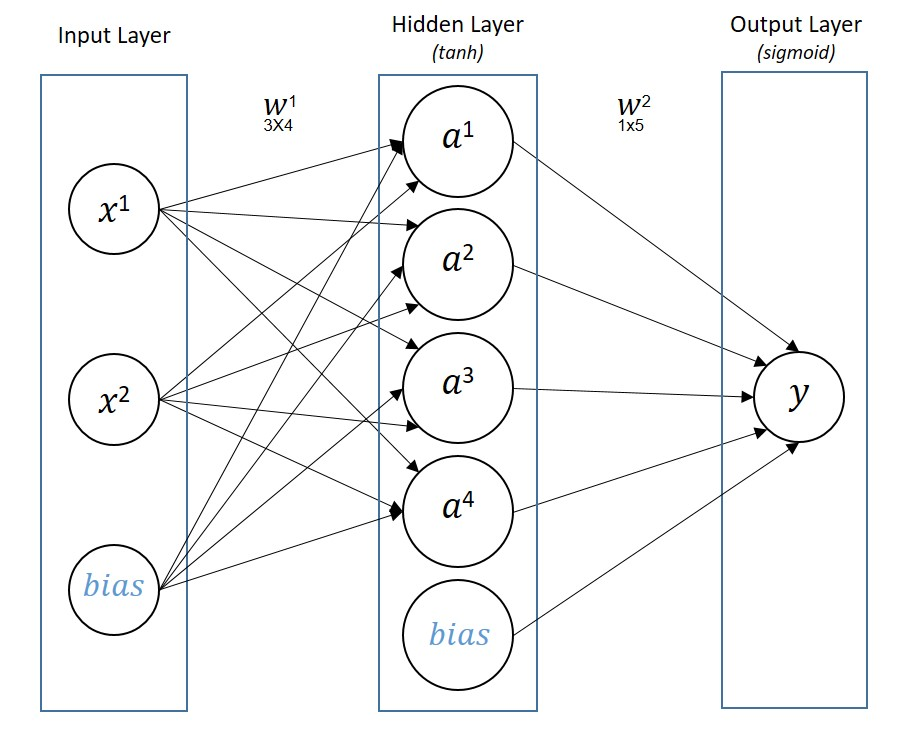
<div align="center">
<center><b>Figure 5. A basic feedforward neural network</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>


Mathematically this network can be represented as follows:

<br><br><center><b>Hidden Layer:</b></center>
$$Z^{[1]} =  X\cdot W^{[1]}  + b^{[1]}\tag{1}$$ 
$$A^{[1]} = tanh(Z^{[1]})\tag{2}$$


<br><br><center><b>Output Layer:</b></center>
$$Z^{[2]} = A^{[1]} \cdot W^{[2]}  + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = sigmoid(Z^{ [2] })\tag{4}$$


<br><br><center><b>Make Predictions:</b></center>
$$y_{predictions} = \begin{cases} 1 & \mbox{if } A^{[2]} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{6}$$

A few notes on notation here.  In general, **each layer has a $W^{[l]}$, $Z^{[l]}$,  and  $A^{[l]}$ vector:**
- $W^{[l]}$ represents the weight vector for layer $l$
- $Z^{[l]}$ represents the linear activation for layer $l$
- $A^{[l]}$ represents the post activation outputs of layer $l$

Given the predictions on all the examples, you can compute the cross entropy loss $J$ just like you would for any other ML algorithm (averaged over all observations of $x^{(i)}$) as follows:


$$J = \frac{1}{m} \sum_{i=0}^m \mathcal{L}(a^{[2](i)}, y^{(i)}) = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{5}$$


where: 
- $a^{[2] (i)}$ represents the $i^{th}$ prediction in $m$ instances (in total they represent $A^{[2]} $).
- $y^{(i)}$ represents the $i^{th}$ true $y$ value (either a 0 or a 1)

Let's implement our simple 2-layer feedforward model in code using NumPy. There are a few simple steps to follow here:

1. We will first define our activation functions (we will use the same sigmoid and relu activation functions we defined above)<br><br>

2. Then we will define our model parameters (number of inputs, hidden layer size, and output layer size)<br><br>

3. Next we declare our weight and bias parameters<br><br>

4. Finally we perform the calculations 

**NOTE:** The cost function equation above involves calculating the outputs and cost on a per example basis (for each value of $x^i$). When we actually implement these equations in code, we will not iterate over our data one example at a time. We will take advantage of NumPy's efficient vector operations to calculate all of the outputs for each example at once.

In [0]:
import numpy as np

""" Declare activation functions """
# Define a sigmoid activation function: # 1 / (1 + exp(−xi))
def sigmoid(xi):
    return 1 / (1 + np.exp(-xi))

# Define a relu function: max(xi,0)
def relu(z):
    return np.where(z < 0.0, 0.0, z) # you can also use np.max(0, xi) here

In [0]:
""" Define model architecture params """
n_observations = 10
n_inputs = 2
n_hidden_neurons = 5
n_output_neurons = 1

In [0]:
""" Perform calculations """
# Generate random inputs
X = np.random.rand(n_observations, n_inputs)

# Params 
W1 = np.random.rand(n_inputs, n_hidden_neurons) # add one for the bias term
b1 = np.random.rand(n_hidden_neurons) # Each Neuron gets same bias term across ALL observations
W2 = np.random.rand(n_hidden_neurons, n_output_neurons) # add one for the bias term
b2 = np.random.rand(n_output_neurons) # Each Neuron gets same bias term across ALL observations

# Layer 1 (Hidden) 
Z1 = np.dot(X,W1) + b1
A1 = tanh(Z1)

# Layer 2 (Output)
Z2 = np.dot(A1,W2) + b2
A2 = sigmoid(Z2)

# Print Results
print("Observations:", n_observations)
print("Hidden neurons:", n_hidden_neurons)
print("Output neurons:", n_output_neurons)
print("X shape:", X.shape)
print("\nW1 shape:", W1.shape)
print("Z1 shape:", Z1.shape)
print("A1 (tanh) shape:", A1.shape)
print("\nW2 shape:", W2.shape)
print("Z2 shape:", Z2.shape)
print("A2 (sigmoid) shape:", A2.shape)
print("\nAverage Output Value:", np.average(A2))

A2

Observations: 10
Hidden neurons: 5
Output neurons: 1
X shape: (10, 2)

W1 shape: (2, 5)
Z1 shape: (10, 5)
A1 (tanh) shape: (10, 5)

W2 shape: (5, 1)
Z2 shape: (10, 1)
A2 (sigmoid) shape: (10, 1)

Average Output Value: 0.8647953457828598


array([[0.84698911],
       [0.86931203],
       [0.87217115],
       [0.87357372],
       [0.88495986],
       [0.85983591],
       [0.87303982],
       [0.88432043],
       [0.82558253],
       [0.85816891]])

You may have also noticed that we had to create separate $W$ and $b$ variables for each layer. This is obviously not very efficient, especially once we start building massive models with multiple layers. Fortunately, the general layer equations we outlined above make feedforward neural networks fairly simple to implement in practice, as the structure of each layer remains the same (only the number of neurons changes). As the graph below illustrates, basic feedforward networks will typically have $L-1$ hidden layers (the minus 1 exists because the last layer is the output layer and doesn't count) which *can be repeated fairly easily* in code. This structure is represented in the graphic below. Here ReLU is used for the middle layer activation functions and sigmoid is used for the output layer activation, however these can change based on the model architecture you define.

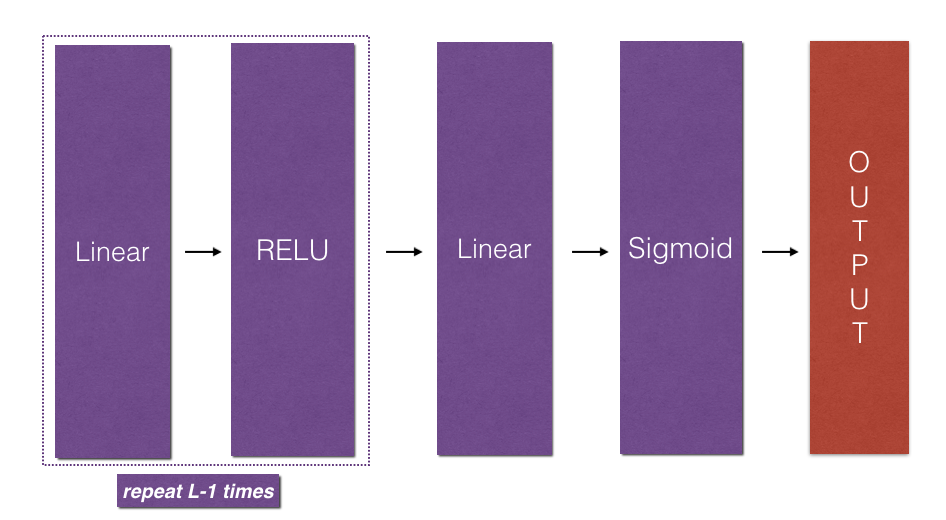
<div align="center">
<center><b>Figure 6. A basic model for an N layer feedforward neural network</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>


We will follow this basic structure when we build our full-scale model later on, as it will allow us to dynamically adjust the size and architecture of our nerual network.

Ok, we have covered the "forward" component of a feedforward neural network. Now we need to move in the **opposite** direction to train the model using a particular method of gradient descent called **backpropagation**. This term sounds daunting, but it is really just a slightly more advanced version of gradient descent that is tweaked specifically for the architecture of neural networks. We will dive deeper into backpropagation and the process of training neural networks shortly. First, let's dig a little more into activation functions!

## Activation Functions

Choosing the correct activation function for your model is a non-trivial task, and there is much research devoted to understanding when and where certain activations perform best. While experimentation is always necessary, there are some basic rules to follow that can speed up the model development process. We briefly introduced the sigmoid, tanh, and ReLU functions above. Let's dig a little deeper into their strengths, weaknesses, and use cases:

- **Sigmoid:** The sigmoid function is primarily used as the ***output layer for binary-classification problems*** (just as with logistic regression, it squashes all output values from 0 to 1). The function is non-linear, but is rarely used in hidden layers. This is because sigmoid activations (when used in hidden layers) can lead us to gradient descent problems when the activations get closer and closer to either zero or 1. This essentially results in gradients that are extremely small, making training very difficult and extremely slow. This is known as the **vanishing gradient** problem. All activation functions suffer from this problem, but sigmoid is generally the worst, so it is almost exclusively used in output layers for binary classification problems. 


- **Tanh:** Tanh is also a non-linear function. It squashes inputs between a range of -1 and 1. Tanh also suffers from the vanishing gradient problem, though to a somewhat lesser degree as compared to sigmoid because the mean of its output is closer to zero, effectively centering the data as it is passed on to each subsequent layer. Tanh is an excellent option for hidden layer activations, though it will generally require additional techniques to prevent the vanishing gradient problem from slowing down training.


- **ReLU:** The ReLU function is another non-linear function, and it tends to suffer the least from the vanishing gradient problem as compared to sigmoid and tanh, as the gradient of ReLU is 0 where inputs are $\leq 0 $, and 1 where inputs are $>0$. That said, it certainly is not immune to vanishing gradients, and furthermore, it can also suffer from what is called the **dying ReLU problem:** during training, some neurons effectively die, meaning they stop outputting anything other than 0. Despite this obvious downside, ReLU is generally the ***preferred hidden layer activation function*** when compared to tanh, as it is less computationally expensive and extremely fast to compute.

**NOTE:** Another small issue with the ReLU activation function is that it is not differentiable at $z = 0$. A function is differentiable at a particular point if its derivative can be calculated, which is necessary in order to be able to perform gradient descent. ReLU is differentiable at all points except 0. This may seem like a huge problem, but in practice ReLU generally performs quite well. This is in part because neural network training algorithms do not usually arrive at a local minimum of the cost function, and $z$ rarely resolves to exactly 0. For our purposes, you don't have to worry about this caveat, however you are encouraged to look into the research on this topic.

The vanishing gradient and dying neuron problems are quite complicated, but there are solutions you can implement to address these issues in your models. These solutions primarily include advanced weight initialization strategies and alternative activation functions, as well as a layer by layer normalization technique called **batch normalization**. These techniques are crucial to developing deep, sophisticated neural network models. However, they are really only required when your models become sufficiently large. That said, in this module we will be starting with fairly simple and small models, so we are not going to dive into the vanishing gradient problem and its potential solutions just yet (though we will in the next module). For smaller models, the ReLU and tanh activation functions will generally suffice for hidden layers.

You might be wondering why we even need activation functions at all, considering they can cause so much trouble in deep models. Well, as we briefly mentioned at the beginning of this module, it's pretty simple: if we removed these non-linearities from our network, then we would just have a linear model! If we did this, then no matter how many layers we added, our model would simply be a linear regression or classification model, which is obviously not sufficient when dealing with massive, complex, non-linear datasets.

Furthermore, ***a neural network with only linear activations usually performs no better than a simple logistic/linear regression model.*** This essentially means you would end up with a much more complicated model and training process for a minor increase (or no increase at all) in performance. Really the only place you would use linear activations is in the output layer of your model (if you are building a regression model and wanted a real number as your output, for instance).

## Random Initialization

Another important component in the training of complicated neural networks is the process of "weight initialization", or the initial values applied to your weights before the first iteration of gradient descent. 

When we are training a simple model like a logistic regression, the weight initialization strategy generally isn't that important as the problem is convex, and thus gradient descent has an easy time reaching the global minimum. However, this isn't the case for neural networks. With multiple layers (each with many neurons) and potentially millions of weights, the initial values of these weights can determine how fast (or slow) gradient descent (backpropagation) is able to converge.

As a demonstration of how important your choice of initialization strategy can be, consider what would happen if we set all of our weights to zeros before our first iteration of backpropagation (spoiler alert, if you take this approach, your neural network won't be able to converge at all). Using "zeros initialization" will cause all of the hidden units to be completely identical (symmetric) and they will compute exactly the same function. On each gradient descent iteration all of the hidden units will always have the same update values, and if all hidden units remain the same we won't get any additional value from having multiple neurons (defeating the purpose of using a neural network)!

Instead, we initialize the weights with small random numbers. It is generally acceptable to initialize the bias weights with zeros, as this won't result in the symmetry problem.

  ```python
     W1 = np.random.randn((2,2)) * 0.1    # 0.01 to make it small enough
     b1 = np.zeros((2,1))                 # It's okay for b to be zero
  ```

We need small values because of functions such as tanh. For example, if the weights are too large you are more likely to end up with very large output values. This causes functions like tanh to be saturated, slowing down learning. Using a constant of 0.1 (as we did in the above code snippet) is fine for a network with a single hidden layer, but if the network is deep with many neurons, this constant should probably be made even smaller. Again, this is due to the vanishing gradient problem that becomes more pronounced with deeper models. We will dig into this in more detail in the next module, as well as some more advanced initialization strategies that can be employed to further mitigate the problem. For now, random initialization will suffice!

Let's re-implement our simple two layer network from above, but this time adding the randomly initialized scaling factor.

In [0]:
""" Perform calculations """
# Generate random inputs
X = np.random.rand(n_observations, n_inputs)

# Params 
W_scaler = 0.1
W1 = np.random.rand(n_inputs, n_hidden_neurons) * W_scaler # Randomly initialize and scale weights
W2 = np.random.rand(n_hidden_neurons, n_output_neurons) * W_scaler # Randomly initialize and scale weights
b1 = np.zeros(n_hidden_neurons) 
b2 = np.zeros(n_output_neurons) 

# Layer 1 (Hidden) 
Z1 = np.dot(X,W1) + b1
A1 = tanh(Z1)

# Layer 2 (Output)
Z2 = np.dot(A1,W2) + b2
A2 = sigmoid(Z2)

# Print Results
print("Observations:", n_observations)
print("Hidden neurons:", n_hidden_neurons)
print("Output neurons:", n_output_neurons)
print("X shape:", X.shape)
print("\nW1 shape:", W1.shape)
print("Z1 shape:", Z1.shape)
print("A1 (tanh) shape:", A1.shape)
print("\nW2 shape:", W2.shape)
print("Z2 shape:", Z2.shape)
print("A2 (sigmoid) shape:", A2.shape)
print("\nAverage Output Value:", np.average(A2))

A2

Observations: 10
Hidden neurons: 5
Output neurons: 1
X shape: (10, 2)

W1 shape: (2, 5)
Z1 shape: (10, 5)
A1 (tanh) shape: (10, 5)

W2 shape: (5, 1)
Z2 shape: (10, 1)
A2 (sigmoid) shape: (10, 1)

Average Output Value: 0.5020355786162037


array([[0.50062933],
       [0.50209129],
       [0.50269554],
       [0.50284749],
       [0.50229072],
       [0.50242904],
       [0.50086498],
       [0.50108144],
       [0.50281334],
       [0.50261261]])

Notice how the average output value is now around 0.5 as opposed to ~0.83 above. This is because the smaller weights result in smaller tanh inputs (Z1), which results in tanh outputs (A1) around 0, and sigmoid outputs (A2) around 0.5.

## Backpropagation

Now that we know how to effectively run data through a simple feedforward neural network &mdash; including choosing the correct activation functions and properly initializing the weight vectors &mdash; we will now discuss the process of helping the model *learn* the correct weight parameters through **backpropagation**, also known as backprop.

For many years, researchers struggled to find a way to train multi-layer neural networks, without success. But in 1986, D. E. Rumelhart et al. published a groundbreaking article introducing the backpropagation training algorithm. Backprop is simply the confluence of two techniques, gradient descent (which we know well by now) and **reverse-mode autodiff** (which is a form of automatic differentiation). Note that while "backprop" and "reverse-mode autodiff" can sometimes be used interchangeably, they refer to slightly different things. Backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients (derivatives) and uses them to perform a gradient descent step (updating the weight and bias parameters). In contrast, reverse-mode autodiff is simply a technique to compute gradients efficiently, and it happens to be used by popular neural net tools like TensorFlow to automatically perform backpropagation.

The basic steps of the overall process can be described as follow:

1. **Forward pass:** First the algorithm goes through the graph in the forward direction (i.e. from the inputs to the output) to compute the value of each node. This is the forward pass, or forward propagation, and it is the exact same as when making predictions.<br><br>

2. **Calculate loss:** Next, it measures the network’s output error and it computes the loss based on a predefined loss function (e.g. for a regression model, one would typically use mean squared error, and for a binary classification model use binary cross-entropy)<br><br>

3. **Backward pass:** Then the algorithm does a second pass, this time in the reverse direction. The algorithm works its way back through the network, computing the partial derivative of the loss function with respect to each consecutive node, until it reaches the input nodes. For this, reverse-mode autodiff relies heavily on calculus' chain rule.<br><br>

4. **Update weights:** Finally, the last step of the backpropagation algorithm is a gradient descent step on all the connection weights in the network (e.g. $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents the parameter vector).
    
***There are many adjustments that can be made to these instructions to further optimize and speed up the training process***, but the fundamental process remains the same: run the inputs through the model, calculate the loss, calculate the partial derivatives of the weights using reverse-mode autodiff, and then update the weights using a gradient descent step.

To get a better understanding of how backprop works, let's apply it to the 2 layer neural network we created above. The basic process will look something like this:

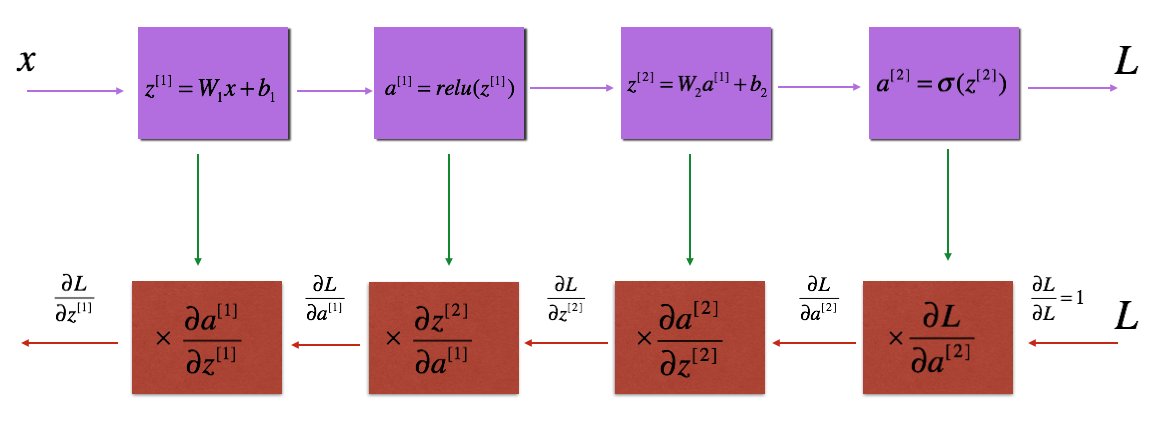
<div align="center">
<center><b>Figure 7. Forward propagation (purple boxes) and backpropagation (red boxes) of a basic N layer neural network</b></center>
<center><i>Source: University of Waterloo</i></center>
</div>

Once we have run forward propagation and calculated our total loss, we can calculate the gradients for the parameters of each layer, which we have done for you below. Note that deriving these gradients requires an understanding of multivariate calculus &mdash; particularly the chain rule &mdash; which is outside the scope of this course. That said, most machine learning packages have sophisticated algorithms to automatically calculate these gradients for you (such as TensorFlow's reverse-mode autodiff implementation). As long as you understand the fundamental process, you can still implement sophisticated neural network models without being a mathematician.

We have outlined the basic backprop equations for our 2 layer model below:


$$\frac{\partial \mathcal{J} }{ \partial z^{[2](i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})\tag{1}$$


$$\frac{\partial \mathcal{J} }{ \partial W^{[2]} } = \frac{\partial \mathcal{J} }{ \partial z^{[2](i)} } a^{[1] (i) T} \tag{2}$$


$$\frac{\partial \mathcal{J} }{ \partial b^{[2]} } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z^{[2](i)}}}\tag{3}$$


$$\frac{\partial \mathcal{J} }{ \partial z^{[1](i)} } =  W^{[2]T} \frac{\partial \mathcal{J} }{ \partial z^{[2](i)} } * ( 1 - a^{[1] (i) 2}) \tag{4}$$


$$\frac{\partial \mathcal{J} }{ \partial W^{[1]} } = \frac{\partial \mathcal{J} }{ \partial z^{[1](i)}} X^T\tag{5} $$


$$\frac{\partial \mathcal{J}}{ \partial b^{[1]} } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z^{[1](i)}}}\tag{6}$$


Once we have the gradients for the $W$ and $b$ parameters, we can update them with the standard gradient descent step:


$$ W^{[1]} = W^{[1]} - \alpha \frac{\partial \mathcal{J} }{ \partial W^{[1]}}\tag{7}$$


$$ W^{[2]} = W^{[2]} - \alpha \frac{\partial \mathcal{J} }{ \partial W^{[2]}} \tag{8}$$


$$ b^{[1]} = b^{[1]} - \alpha \frac{\partial \mathcal{J} }{ \partial b^{[1]}} \tag{9}$$


$$ b^{[2]} = b^{[2]} - \alpha \frac{\partial \mathcal{J} }{ \partial b^{[2]}} \tag{10}$$

Collectively, the above 10 steps represent a single iteration of backpropagation, or gradient descent using reverse-mode autodiff. Translating these steps to English, they can be broken down as follows:

- **Step 1:** Calculate the derivative of loss with respect to $z^{[2]}$


- **Step 2:** Calculate the derivative of loss with respect to $W^{[2]}$


- **Step 3:** Calculate the derivative of loss with respect to $b^{[2]}$


- **Step 4:** Calculate the derivative of loss with respect to $z^{[1]}$


- **Step 5:** Calculate the derivative of loss with respect to $W^{[1]}$


- **Step 6:** Calculate the derivative of loss with respect to $b^{[1]}$


- **Step 7:** Multiply the partial derivative of $W^{[1]}$ by the learning rate, subtract the product from $W^{[1]}$ to complete the gradient descent step


- **Step 8:** Multiply the partial derivative of $b^{[1]}$ by the learning rate, subtract the product from $b^{[1]}$ to complete the gradient descent step


- **Step 9:** Multiply the partial derivative of $W^{[2]}$ by the learning rate, subtract the product from $W^{[2]}$ to complete the gradient descent step


- **Step 10:** Multiply the partial derivative of $b^{[2]}$ by the learning rate, subtract the product from $b^{[2]}$ to complete the gradient descent step

Once the weights and bias terms are updated, the process starts all over again for as many iterations as the user defines! If this process seems a little overwhelming, don't worry, in the next section we will implement these concepts in code to give you a more clear understanding of the underlying mechanics.

# Building a Neural Network from Scratch with NumPy

Enough theory, let's get to building some models! However, before we jump into using high-level APIs that make model development simple, we are going to build a model from scratch using NumPy. This process will give you a very clear understanding of the underlying mechanics of how neural networks work, which is essential before diving into deep learning.

In the following sections, we are going to build a series of functions that will be the building blocks for a full neural network model. The functions will take in several parameters which will allow us to adjust the size and architecture of our model with ease, including the number of hidden layers, number of neurons in each layer, and the activation functions at each layer (though the last layer must be a single neuron with a sigmoid activation as we will be building a binary classifier).

The model build process will be broken down into:

1. **Manual forward propagation:** Here we will build the necessary functions to feed data through our neural network. This will include weight initialization steps, selection of activation functions, and computing the cost (the loss function).<br><br>

2. **Manual backward propagation:** Here we will build the necessary functions to calculate the gradients of all the parameter vectors, and perform a single step of gradient decent.<br><br>

3. **Model construction:** Here we will take all of the pieces and put them together to train our first custom neural network model.

Let's get started!

First, let's load some data to run through our model. We will use sklearn's Iris dataset, and convert the target ($y$ values) to binary.

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np


# First lets load some data to run through our model
iris = load_iris()
X_train = iris['data']
y_train = iris['target'].reshape(-1,1)

# Isolate only 2 classes (to make a binary classifier)
y_train[y_train==2]=0

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Classes:", np.unique(y_train))

X_train: (150, 4)
y_train: (150, 1)
Classes: [0 1]


## Manual Forward Propagation

To perform forward propagation we will need to create several helper functions:

- `init_params`: Which simply creates a list of params and randomly initializes them. This function will be dynamic, and will adjust the parameter outputs based on the number of layers, neurons, as well as the input and outputs shapes the user identifies.


-  `relu`: We will use the `relu` function we created above. This will serve as an option for our hidden layer activation function.


-  `tanh`: We will use the `tanh` function we created above. This will serve as an option for our hidden layer activation function.


-  `sigmoid`: We will use the `sigmoid` function we created above. This will serve as our output layer activation function.


-  `L_model_forward`: This function will propagate the inputs values through the hidden and output layers.


- `compute_cost`: Simply compute the loss (entropy) over all observations.

Overall, our model's structure should conform to the following table:

<table order="1" width="80%">
	<col style="width:15%">
	<col style="width:10%">
	<col style="width:30%">
	<col style="width:15%">
	<col style="width:15%">
	<col style="width:15%">

  <tr>
    <th>Layer #</th>
    <th>Inputs</th> 
    <th>Outputs</th> 
    <th>Shape of Weight Vector</th> 
    <th>Shape of Bias Vector</th>
    <th>Shape of Output Vector</th>
  </tr>
  <tr>
    <td>Layer 1</td>
    <td>$X$</td>
    <td>$A^{[1]} = ReLU(X \cdot W^{[1]} + b^{[1]})$</td>
    <td>$(n\_inputs, n^{[1]})$</td> 
    <td>$(1, n^{[1]})$</td>
    <td>$(m, n^{[1]})$</td>
  </tr>
   <tr>
    <td>Layer 2</td>
    <td>$A^{[1]}$</td>
    <td>$A^{[2]} = ReLU(A^{[1]} \cdot W^{[2]} + b^{[2]})$</td>
    <td>$(n^{[1]}, n^{[2]})$</td> 
    <td>$(1, n^{[2]})$</td>
    <td>$(m, n^{[2]})$</td>
  </tr>
   <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td> 
    <td>...</td>
    <td>...</td>
  </tr>
   <tr>
    <td>Layer L</td>
    <td>$A^{[L-1]}$</td>
    <td>$\hat{Y} = A^{[L]} = \sigma(A^{[L-1]} \cdot W^{[L]} + b^{[L]})$</td>
    <td>$(n^{[L-1]}, n\_outputs)$</td> 
    <td>$(1, n\_outputs)$</td>
    <td>$(m, n\_outputs)$</td>
  </tr>
</table>

where:
- $n\_inputs$ refers to the number of input features (columns in $X$)
- $m$ refers to the number of observations (rows in $X$)
- $n^{[l]}$ refers to the number of neurons in layer $l$
- $L$ refers to the final layer of the model. Note that we leave this ambiguous, as we want to be able to create models of any size.
- $n\_outputs$ refers to the number of neurons in our final layer. This is equivalent to $n^{[L]}$.
    
Note that in our case, $n\_outputs$ (or $n^{[L]}$) will always be equal to 1. We are creating a binary classifier, so we only want a single output neuron that will give us a value between one and zero (the sigmoid output).

Alright, let's start building our first function: `init_params`.

In [0]:
def init_params(n_inputs, hidden_dims, output_dims=1, init_scale=0.05):
    """
    Dynamically generate randomly initialized parameters for model based on user inputs.
    Arguments:
        n_inputs (int): number of inputs features
        hidden_dims (list): number of neurons (integers) in each hidden layer
        output_dims (int): number of output neurons in layer L
        init_scale (float): scaling factor for random initialization 
    Returns:
        parameters (dictionary): a dictionary of weight and bias parameters for each layer.
    """
    # Create layer dimensions
    layer_dims = [n_inputs] + hidden_dims + [output_dims]
    L = len(layer_dims) # number of layers in the network
    
    # Loop through L layers and create parameter vectors of appropriate sizes
    parameters = {}    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * init_scale # Use small scaling factor
        parameters['b' + str(l)] = np.zeros((1, layer_dims[l]))
        # Double check parameter sizes
        assert(parameters['W' + str(l)].shape == (layer_dims[l-1], layer_dims[l]))
        assert(parameters['b' + str(l)].shape == (1, layer_dims[l]))
    
    return parameters

In [0]:
# Let's test it out
n_inputs = X_train.shape[1] # Extract number of inputs from training data
hidden_layers = [32, 32] # Layer 1 will have 32 neurons, Layer 2 two will have 32 neurons
n_outputs = 1

parameters = init_params(n_inputs,hidden_layers,n_outputs)
for key, value in parameters.items():
    print(key, value.shape)

W1 (4, 32)
b1 (1, 32)
W2 (32, 32)
b2 (1, 32)
W3 (32, 1)
b3 (1, 1)


We have initialized our weights! ***It is very important that you understand what is going on here, as this function sets up the fundamental architecture of our model (i.e. the number of layers and neurons)***. Play around with it, check out the shapes of the parameters, and make sure you are comfortable with what is happening here.

Once you are familiar with the `init_params` function, let's build the function to feed our data through our model: `L_model_forward`.

In [0]:
def L_model_forward(X, paremeters, tanh=False, print_shapes=False):
    """
    Runs X inputs through the model layers (based on the number parameters in `paremeters` dictionary) for a single forward pass
    Arguments:
        X (numpy array): input data to be run through the model. Input size should match `n_inputs` specified in W1 of parameters arg
        parameters (dictionary): model weights and bias vectors for each layer
        tanh (boolean): if True, use tanh activation for hidden layers, else use ReLU (default)
        print_shapes (boolean): purely for demonstration purposes; if True, print layer shapes
    Retruns:
        A (numpy array): the final layer output for a single forward pass (A[L])
        caches (tuple): cached layer outputs (used for backprop) in the form of ((A_prev, W, b), Z) 
    """      
    L = len(paremeters) // 2
    A = X # Initialize X as first A value    
    caches = []
    for l in range(1, L+1):
        # Extract parameters
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        
        # Run forward prop for layer l
        A_prev = A # Set A_prev to output from previous loop         
        Z = np.dot(A_prev, W) + b # linear activation
        if print_shapes:
            print("A[{}] shape:".format(l), A_prev.shape)
            print("W[{}] shape:".format(l), W.shape)
            print("Z[{}] shape:".format(l), Z.shape)
        
        # Non-linear activation
        if l == L:
            A = sigmoid(Z) # sigmoid for last layer
        else:
            if tanh:
                A = np.tanh(Z) # use numpy tanh function for speed
            else:
                A = relu(Z) # use custom relu function

        # Cache forward prop values to be used by backward prop
        cache = ((A_prev, W, b), Z) 
        caches.append(cache)
        assert (A.shape == (A_prev.shape[0], W.shape[1]))

    return A, caches

In [0]:
# Let's test it out
parameters = init_params(n_inputs,hidden_layers,n_outputs) # using same parameters as above

# Run X through the model 
AL, caches = L_model_forward(X_train, parameters, tanh=True, print_shapes=True)
AL.shape

A[1] shape: (150, 4)
W[1] shape: (4, 32)
Z[1] shape: (150, 32)
A[2] shape: (150, 32)
W[2] shape: (32, 32)
Z[2] shape: (150, 32)
A[3] shape: (150, 32)
W[3] shape: (32, 1)
Z[3] shape: (150, 1)


(150, 1)

Take a quick look at the shapes of the outputs above. You should be able to follow the series of matrix multiplications to the final output layer. The output shapes should also match what we have in the table above. In general, it is important to pay close attention to the shapes of the individual inputs and outputs of your neural network model, as it will help you ensure that all of the appropriate connections are being made between layers.

In [0]:
# print the number of caches
print(len(caches))

3


Also take note that `caches` has 3 elements &mdash; one for each layer in the model (2 hidden and 1 output). We save $A_prev$, $W$, $b$, and $Z$ from each layer in the `caches` variable so we can use them during training when backpropagating through the layers to calculate the partial derivatives.

Now that we have initialized our weights and run forward propagation, we can now compute our model's loss. Note that we don't actually use this function in training (we don't need the loss value to compute the gradients, as we use some mathematical shortcuts to make the calculations simpler). However, we will use this function to compute the cost at the end of every training epoch so we can monitor the training progress.

In [0]:
def compute_cost(AL, Y):
    """
    Computes the binary crossentropy loss
    Arguments:
        AL (numpy array): output of the last layer of the model (each element of array is sigmoid output between 0 and 1) 
        Y (numpy array): true Y values (0 or 1), should be same shape AL
    Returns:
        cost (float): the average loss over m instances
    """      
    m = Y.shape[0]
    # Compute loss from AL and y using binary cross entropy function
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))        
    return cost

In [0]:
# Let's test it out
parameters = init_params(n_inputs,hidden_layers,n_outputs) # using same parameters as above

# Run X through the model 
AL, caches = L_model_forward(X_train, parameters, tanh=False, print_shapes=False)

# Calculate cost
cost = compute_cost(AL,y_train)
#cost

Excellent! We can now initialize our weights based on a user defined model architecture (number of layers and number of neurons per layer), run training data through those layers, and calculate the overall loss of the model. 

We have thus far successfully implemented a forward pass of a neural network. Now, for the slightly more challenging part, let's build functions to train the model.

## Manual backpropagation

The first thing we have to do is write functions to calculate the gradients of the activation functions. Again, don't get too bogged down by the math here, as TensorFlow and Keras will take care of the heavy lifting in most cases. However if you are interested, the gradients of the activation functions can be computed as follows:

- Derivation of the sigmoid activation function:

    ```
    g(z)  = 1 / (1 + np.exp(-z))
    g'(z) = (1 / (1 + np.exp(-z))) * (1 - (1 / (1 + np.exp(-z))))
    g'(z) = g(z) * (1 - g(z))
    ```


- Derivation of the tanh activation function:

    ```
    g(z)  = (e^z - e^-z) / (e^z + e^-z)
    g'(z) = 1 - np.tanh(z)^2 = 1 - g(z)^2
    ```


- Derivation of the relu activation function:

    ```
    g(z)  = np.maximum(0,z)
    g'(z) = { 0  if z < 0
              1  if z >= 0  }
    ```

In [0]:
def sigmoid_backward(dA, cache):
    """Calculate gradients of loss with respect to Z"""
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s) # Multiply by dA (chain rule)
    return dZ

def tanh_backward(dA, cache):
    """Calculate gradients of loss with respect to Z"""
    Z = cache
    dZ = dA.T * (1 - np.tanh(Z)**2) # Multiply by dA (chain rule)
    return dZ

def relu_backward(dA, cache):
    """Calculate gradients of loss with respect to Z"""
    Z = cache 
    dZ = np.array(dA.T, copy=True) # Multiply by dA (chain rule)
    dZ[Z <= 0] = 0     
    return dZ

Alright, now that we have our activation derivative functions, let's put everything together into a single `L_model_backward` function. Just as we did with `L_model_forward`, this function will gradually backpropagate the gradients from Layer $L$ (the last layer) to the input layer, calculating all the gradients along the way.

In [0]:
def L_model_backward(AL, Y, caches, tanh=False):
    """
    Compute gradients of dW/db for each layer via backpropagation
    Arguments:
        AL (numpy array): output of the last layer of the model (each element of array is sigmoid output between 0 and 1) 
        Y (numpy array): true Y values, should be same shape AL
        tanh (boolean): if True, use tanh activation for hidden layers, else use ReLU (default)
    Returns:
        grads (dictionary): gradients for dW/db of each layer
    """ 
    grads = {}
    L = len(caches) # number of layers
    m = AL.shape[0] # number of observations

    # Calculate dA, dZ, dW, dv for layer L
    (A_prev, W, b), Z = caches[-1]
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    dZ = sigmoid_backward(dAL, Z) 
    dW = (1. / m) * np.dot(dZ.T, A_prev) 
    db = (1. / m) * np.sum(dZ.T, axis=1, keepdims=True)

    # Calculate dA_prev for layer L-1
    dA_prev = np.dot(W, dZ.T)
    
    # Store gradients
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    
    # Loop through remaining layes
    for l in reversed(range(1, L)):
        # Calculate dA, dZ, dW, dv for layer l
        (A_prev, W, b), Z = caches[l-1]
        if tanh:
            dZ = tanh_backward(dA_prev, Z)
        else:
            dZ = relu_backward(dA_prev, Z)
        dW = (1. / m) * np.dot(dZ.T, A_prev) 
        db = (1. / m) * np.sum(dZ.T, axis=1, keepdims=True)
        # Calculate dA_prev for layer L-1
        dA_prev = np.dot(W, dZ.T) 
        # Store gradients
        grads["dW" + str(l)] = dW
        grads["db" + str(l)] = db
    return grads

grads = L_model_backward(AL, y_train, caches, tanh=True)

Great, now we can calculate the `dW` and `db` variables (derivatives of the loss function with respect to the weight and bias parameters) for each layer, and use these to perform a gradient descent step. This step will be performed by the `update_parameters` function, which we have defined below.

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters W/b with gradients dW/db for each layer, to complete a step of backpropagation 
    Arguments:
        parameters (dictionary): model weights and bias vectors for each layer
        grads (dictionary): parameter gradients (output of `L_model_backward` function)
        learning_rate (float): learning rate for gradient descent step
    Returns:
        parameters (dictionary): updated weight and bias parameters
    """ 
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter; loop through each layer
    for l in range(1, L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)].T # Transpose to match weight shape
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)].T # Transpose to match weight shape
    return parameters

## Constructing our Neural Network

Alright, now let's put all the above functions together and see if we can train this thing!

Epoch: 0 	Cost: 0.6931004142016286 	Accuracy: 0.66
Epoch: 2000 	Cost: 0.6354945080409443 	Accuracy: 0.6666666666666666
Epoch: 4000 	Cost: 0.584456852641838 	Accuracy: 0.6666666666666666
Epoch: 6000 	Cost: 0.19252845585113 	Accuracy: 0.9533333333333334
Epoch: 8000 	Cost: 0.06602559936244953 	Accuracy: 0.9733333333333334
Epoch: 10000 	Cost: 0.050353627838459036 	Accuracy: 0.98
Epoch: 12000 	Cost: 0.045054737322467224 	Accuracy: 0.98
Epoch: 14000 	Cost: 0.04267965763168566 	Accuracy: 0.98
Epoch: 16000 	Cost: 0.04148215586697586 	Accuracy: 0.9866666666666667
Epoch: 18000 	Cost: 0.04082466844204975 	Accuracy: 0.9866666666666667


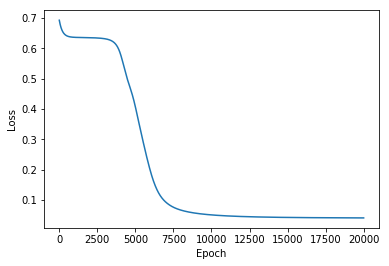

In [0]:
from sklearn.metrics import accuracy_score

# Set parameters
n_inputs = X_train.shape[1]
n_outputs = 1
hidden_layers = [32,32] # 2 layers, each with 32 neurons
init_scale = 0.02
learning_rate = 0.01
tanh = False

# Randomly initialize params
parameters = init_params(n_inputs, [32, 32], n_outputs, init_scale=init_scale)

# Run model
n_epochs =20000
losses = []
for epoch in range(n_epochs):
    # Run forward propogation
    AL, caches = L_model_forward(X_train, parameters, tanh=tanh)
    
    # Compute cost/accuracy; print after 2000 epochs
    loss = compute_cost(AL, y_train)
    losses.append(loss)
    if epoch % (n_epochs//10) == 0:
        y_hat = np.where(AL>0.5,1,0).reshape(-1)
        print("Epoch:",epoch, "\tCost:", loss, "\tAccuracy:", accuracy_score(y_train, y_hat))

    # Run backward popogation and update parameters
    grads = L_model_backward(AL, y_train, caches, tanh=tanh)
    parameters = update_parameters(parameters, grads, learning_rate)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Look at that! We just successfully built and trained a neural network from scratch without any fancy high-level packages! You may want to try tweaking some of the parameters and see how it affects the results. Here are a couple things you could experiment with:

- **Change the dataset:** Perhaps try a more complicated dataset to make things interesting. Note you will need to change the output layer and output activation function if you want to build a regression model (use a linear activation for the output) or a multi-class model (use a softmax function with $n$ output nodes, where $n$ is the number of output classes). However, if you do this, you will also need to adjust the gradient calculations, so you may want to stick with binary classification problems for now.


- **Adding more layers or neurons:** Adjust the model architecture and see how accuracy/loss is affected. Again, you may want to load a more complicated binary classification dataset first.


- **Adjust the learning rate and `init_scale` params:** These parameters both have a huge impact on training. Try making some slight adjustments and see how it affects the loss function plot above.


- **Change the activation function**: Try combining all of the above changes, and see how they are affected by different activation functions (for the hidden layers). To do this, all you have to do is change the `tanh` argument to `True`.

This was a very important exercise for you to get a solid fundamental understanding of how neural networks are built and trained, but we won't be building these models from scratch every time. Building a highly accurate and useful model requires rapid development and testing, where parameters can be continually adjusted until the best architecture is found. This is what TensorFlow and Keras allow us to do. We will discuss both of these packages in the next section of the module.

**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

- Géron, A. (2019). Chapter 10: Introduction to Artificial Neural Networks with Keras in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/


- Rumelhart, D. E., Hinton, G. E. & Williams, R. J. (1986). Learning Representations by Back-propagating Errors. Nature, 323, 533--536. doi: 10.1038/323533a0 


- TensorFlow documentation and tutorials: https://www.tensorflow.org/tutorials


- University of Waterloo - Images by Michael Ciniello. 